In [57]:
import matplotlib.pyplot as plt

In [58]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [59]:
train_data, test_data = load_titanic_data()

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [62]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [63]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
train_data['FamilySize'] = (train_data['SibSp'] + train_data['Parch']).astype(int)
test_data['FamilySize'] = (test_data['SibSp'] + test_data['Parch']).astype(int)

In [65]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [66]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


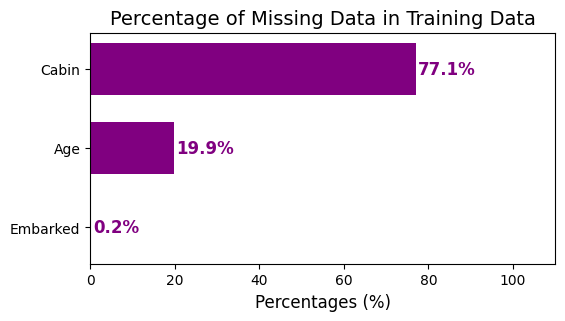

In [67]:
def missing_percent_plot(df, data_string):
    '''
    This function visualizes the percentage of missing data in each feature of a DataFrame
    '''
    # Calculate the percentage of missing value in each feature
    nan_percent= 100*(df.isnull().sum()/len(df))

    # Filtering features with missing value
    nan_percent= nan_percent[nan_percent>0].sort_values()
    nan_percent = round(nan_percent,1)

    # Plot the barh chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.barh(nan_percent.index, nan_percent.values, color='purple', height=0.65)

    # Annotate the values and indexes
    for i, (value, name) in enumerate(zip(nan_percent.values, nan_percent.index)):
        ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='purple', fontsize=12)

    # Set x-axis limit
    ax.set_xlim([0,110])

    # Add title and xlabel
    plt.title("Percentage of Missing Data in " + data_string, fontsize=14)
    plt.xlabel('Percentages (%)', fontsize=12)
    plt.show()

missing_percent_plot(train_data, 'Training Data')

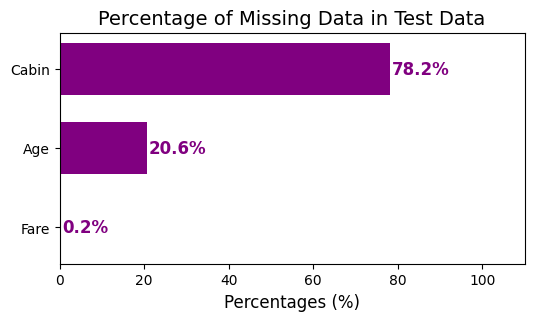

In [68]:
missing_percent_plot(test_data, 'Test Data')

In [69]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [70]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [71]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [72]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [73]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])


num_attribs = ["Age", "SibSp", "Parch", "Fare","FamilySize"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])



In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [95]:
x=train_data.drop(["Survived"],axis=1)
y=train_data["Survived"]

Using train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [118]:
x_train = preprocess_pipeline.fit_transform(x_train)
x_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 1.25363981, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47728209, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.21508667, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.90745543,  1.23056874, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-1.16965085,  0.37992316,  2.04874166, ...,  0.        ,
         0.        ,  1.        ],
       [-0.63114182, -0.47072241,  0.78470001, ...,  0.        ,
         0.        ,  1.        ]])

In [119]:
x_test = preprocess_pipeline.transform(x_test)

In [120]:
x_test

array([[-0.09263278,  0.37992316,  0.78470001, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.13815681, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-0.70807168, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.67666584,  0.37992316,  5.8408666 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.93886126, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-1.93894947,  0.37992316,  0.78470001, ...,  0.        ,
         0.        ,  1.        ]])

In [121]:
y_train

PassengerId
332    0
734    0
383    0
705    0
814    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: Survived, Length: 712, dtype: int64

In [122]:
xgb_clf = XGBClassifier(
    random_state=62
)

xgb_clf = xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)


print('Default XGB accuracy: ', accuracy_score(y_test, y_pred))
print('Default XGB f1-score: ', f1_score(y_test, y_pred))

Default XGB accuracy:  0.7877094972067039
Default XGB f1-score:  0.7466666666666667


In [123]:
xgb_scores = cross_val_score(xgb_clf, x_train, y_train, cv=10)
xgb_scores.mean()

0.7893388106416276